In [ ]:
# Trabalhando com dados em tabelas
import pandas as pd

# Trabalhando com gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_excel('/content/DADOS.xlsx') # Carregando o arquivo XLSX

In [ ]:
dados.head()

,ID,MARCA,VALOR(R$),MODELO,COR,PNEU,AROS,PEDAIS,GUIDÃO,RÓTULO,QUANTIDADE
0,1,Caloi,3299.0,Explorer Comp – 2023,Preta / Azul,VeeRubber PRO MT100 29X2.20,Rodi Blackrock 32 furos com ilhós,MTB Plástico Feimin FP803B,Aluminio 740mm,"A linha Comp está melhor do que nunca,\n proje...",50
1,2,Caloi,2491.0,Moab Flex,Grafite,Levorin Eruption 2.3,VZAN parede dupla 29 polegadas,Pedal Freestyle - Plataforma,MTB Alumínio 31.8x720mm,Dedicada os entusiastas das trilhas que buscam...,25
2,3,Caloi,1992.0,Caloi 10,Preta / Laranja,700x28,Aro 700 - Alumínio - Parede dupla,Plástico,Alumínio 25.4x420mm,"Um dos maiores clássicos da Caloi, em sua vers...",10
3,4,Audax,2999.0,Havok TX,Laranja / Azul,29X2.10 H5129 SKINWALL 52-622 \nPRETO,AROS 29”,"VPE-899, MTB, PLÁSTICO",ADX ALUM. 31.8X440/460MM \nPRETO,Os quadros possuem geometrias confortáveis par...,56
4,5,Audax,8999.0,Ventus 2000 Tiagra,Inox,CHAOYANG KEVLAR 700x25C,NaN,9/16 VPE-899 MTB EM PLÁSTICO,ADX ALUM. 31.8X440/460MM\n PRETO,"Prontas para os terrenos ousados, \na Linha Au...",74


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = ['MARCA', 'MODELO', 'COR', 'PNEU', 'AROS', 'PEDAIS', 'GUIDÃO', 'RÓTULO'])
y = dados['MARCA']   # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.head(5)

,ID,VALOR(R$),QUANTIDADE
65,66,2591.0,81
26,27,2012.0,92
22,23,2101.0,28
31,32,5995.0,14
47,48,2169.0,64


In [ ]:
y_train.head(5)

65          Sense
26           Oggi
22           Oggi
31    Soul Cycles
47          Caloi
Name: MARCA, dtype: object

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()  # Criando o objeto do classificador

lda.fit(x_train,y_train) # Treinando o classificador passando apenas o conjunto de dados de treinamento

LinearDiscriminantAnalysis()

In [ ]:
# Passando apenas o x de teste
y_predicoes = lda.predict(x_test)

In [ ]:
y_predicoes

array(['Sense', 'Trek', 'Oggi', 'KRW', 'Groove', 'Sense', 'Caloi',
       'Groove', 'Cannondale', 'Oggi', 'Specialized', 'Cannondale',
       'Oggi', 'Cannondale', 'Soul Cycles', 'Groove', 'Groove', 'Groove',
       'Giant', 'Caloi', 'Oggi', 'Caloi'], dtype='<U11')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [ ]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Caloi','Oggi', 'Audax', 'Sense', 'Cannodale'])

<Figure size 1500x500 with 0 Axes>

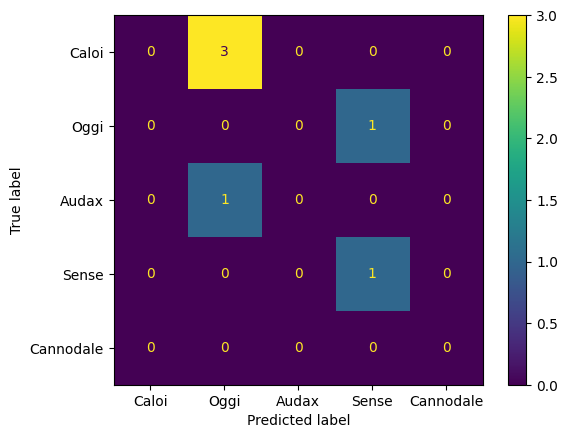

In [ ]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Caloi','Oggi', 'Audax', 'Sense', 'Cannodale'])
disp.plot(values_format='d')

In [ ]:
accuracy_score(y_true = y_test, y_pred = y_predicoes,)

0.18181818181818182

In [ ]:
precision_score(y_true=y_test, y_pred=y_predicoes, average='micro')


0.18181818181818182

In [ ]:
precision_score(y_true=y_test, y_pred=y_predicoes, average='micro')


0.18181818181818182

In [ ]:
precision_score(y_true=y_test, y_pred=y_predicoes, average='micro')


0.18181818181818182

In [ ]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

       Audax       0.00      0.00      0.00         1
       Blitz       0.00      0.00      0.00         1
       Caloi       0.00      0.00      0.00         7
  Cannondale       0.67      0.67      0.67         3
       Colli       0.00      0.00      0.00         1
       Giant       0.00      0.00      0.00         0
      Groove       0.20      1.00      0.33         1
         KRW       0.00      0.00      0.00         1
        Oggi       0.00      0.00      0.00         2
       Sense       0.50      0.50      0.50         2
 Soul Cycles       0.00      0.00      0.00         2
 Specialized       0.00      0.00      0.00         1
        Trek       0.00      0.00      0.00         0

    accuracy                           0.18        22
   macro avg       0.11      0.17      0.12        22
weighted avg       0.15      0.18      0.15        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import pickle

In [ ]:
# Salvando em bytes (flag wb) para ser mais cross-platform (acessível a vários sistemas)
with open('meu_modelo_serializado.pickle', 'wb') as f:
    pickle.dump(lda, f)

In [ ]:
with open('meu_modelo_serializado.pickle', 'rb') as f:
    modelo_carregado = pickle.load(f)

In [ ]:
modelo_carregado.predict([[1,2,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['Trek'], dtype='<U11')

#Análise e criação de modelo com arquivo de imagem

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
# Carregando a imagem
image_path = '/content/1.png'
image = load_img(image_path, target_size=(224, 224))

In [ ]:
# Convertendo a imagem em um array numpy
image_array = img_to_array(image)
image_array = image_array / 255.0  # Pré-processamento para redimensionar os valores dos pixels para [0, 1]

In [ ]:
# Criando um modelo de classificação de imagens
model = keras.applications.MobileNetV2(weights='imagenet')

14536120/14536120 [==============================] - 0s 0us/step


In [ ]:
# Previsões com base na imagem
image_array = np.expand_dims(image_array, axis=0)
predictions = model.predict(image_array)

1/1 [==============================] - 1s 1s/step


In [ ]:
decoded_predictions = keras.applications.mobilenet_v2.decode_predictions(predictions)
top_prediction = decoded_predictions[0][0]  # A classe com maior probabilidade

print(f'Classe prevista: {top_prediction[1]}')
print(f'Probabilidade: {top_prediction[2]}')

35363/35363 [==============================] - 0s 0us/step
Classe prevista: mountain_bike
Probabilidade: 0.41645243763923645


#Manipulação do arquivo .h5


In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
model = load_model('/content/keras_model.h5', compile=False)

In [ ]:
class_names = open('/content/labels.txt', "r").readlines()

In [ ]:
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [ ]:
image = Image.open('/content/1.png').convert("RGB")

In [ ]:
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

In [ ]:
image_array = np.asarray(image)

In [ ]:
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

In [ ]:
data[0] = normalized_image_array

In [ ]:
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

1/1 [==============================] - 2s 2s/step


In [ ]:
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

Class: Bicicleta
Confidence Score: 1.0
